# Neural networks using tensorflow

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

import matplotlib.pyplot as plt
import netCDF4 as n
%matplotlib inline
from utils import train_test_split

In [3]:
from tflow_reg import nn_model

## Import data

In [4]:
path = "./files/"
filenames = ["specific_humidity_Europa_sp.nc", "relative_humidity_Europa_sp.nc", "pressure_Europa_sp.nc",  
             "temperature_Europa_sp.nc", "total_cloud_cover_Europa_sp.nc"]


cloud = n.Dataset(path + filenames[-1], "r")
relative = n.Dataset(path + filenames[1], "r")
specific = n.Dataset(path + filenames[0], "r")
pressure = n.Dataset(path + filenames[2], "r")
temperature = n.Dataset(path + filenames[3], "r")

my_files = {'cloud':cloud, 'relative':relative, 'specific':specific, 'pressure':pressure, 'temperature':temperature}


tcc = cloud.variables["tcc"]
rh = relative.variables["r"]
q = specific.variables["q"]
sp = pressure.variables["sp"]
t2m = temperature.variables["t2m"]

my_vars = {'tcc':tcc, 'rh':rh, 'q':q, 'sp':sp, 't2m':t2m}


X = np.empty((tcc.shape[1]*tcc.shape[2], 4))
y = np.empty((tcc.shape[1]*tcc.shape[2], 1))

i=0
for key, value in my_vars.items():
    if key == 'tcc':
        y = np.array(value[0, : , :]).flatten()
    elif key == 'rh' or key == 'q':
        X[:, i] = np.array(value[0, 0, : , :]).flatten()
        i = i+1
    else:
        X[:, i] = np.array(value[0, : , :]).flatten()
        i=i+1

### Normalize and split

In [5]:
Xn = (X - X.mean())/X.std()
yn = (y - y.mean())/y.std()

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, split_size=0.3)

In [6]:
type(Xn_train)

numpy.ndarray

In [7]:
Xn_train.shape

(3288, 4)

In [8]:
# Xn_train = tf.cast(Xn_train, tf.float32)  # convert to float 32 so that we can use tf.matmul

## Neural net model

Feed forward neural net with 2 layers. Activation function: Sigmoid for all layers.

TODO: write as function

In [9]:
"""
### Define weights and biases

npred = Xn_train.get_shape().as_list()[1]  # number of predictors
npred

tf.shape(Xn_train)

# Using normal distribution (maybe change this)

W_1 = tf.Variable(tf.random_uniform([npred,10]))
b_1 = tf.Variable(tf.zeros([10]))

### Define layer 1 and activation f

layer_1 = tf.add(tf.matmul(Xn_train,W_1), b_1)
# layer_1 = tf.nn.relu(layer_1)
layer_1 = tf.nn.sigmoid(layer_1)  

layer_1 = tf.nn.relu(layer_1)

### Multiply by layer 1 and add bias. Then activation function
#### Obtain layer 2

W_2 = tf.Variable(tf.random_uniform([10,10]))
b_2 = tf.Variable(tf.zeros([10]))
layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
layer_2 = tf.nn.sigmoid(layer_2)

### Multiply by layer 2 and add bias. Then activation function
#### Obtain output

W_O = tf.Variable(tf.random_uniform([10,1]))
b_O = tf.Variable(tf.zeros([1]))
output = tf.add(tf.matmul(layer_2,W_O), b_O)

"""

'\n### Define weights and biases\n\nnpred = Xn_train.get_shape().as_list()[1]  # number of predictors\nnpred\n\ntf.shape(Xn_train)\n\n# Using normal distribution (maybe change this)\n\nW_1 = tf.Variable(tf.random_uniform([npred,10]))\nb_1 = tf.Variable(tf.zeros([10]))\n\n### Define layer 1 and activation f\n\nlayer_1 = tf.add(tf.matmul(Xn_train,W_1), b_1)\n# layer_1 = tf.nn.relu(layer_1)\nlayer_1 = tf.nn.sigmoid(layer_1)  \n\nlayer_1 = tf.nn.relu(layer_1)\n\n### Multiply by layer 1 and add bias. Then activation function\n#### Obtain layer 2\n\nW_2 = tf.Variable(tf.random_uniform([10,10]))\nb_2 = tf.Variable(tf.zeros([10]))\nlayer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)\nlayer_2 = tf.nn.sigmoid(layer_2)\n\n### Multiply by layer 2 and add bias. Then activation function\n#### Obtain output\n\nW_O = tf.Variable(tf.random_uniform([10,1]))\nb_O = tf.Variable(tf.zeros([1]))\noutput = tf.add(tf.matmul(layer_2,W_O), b_O)\n\n'

### Run neural network model

In [20]:
#npred = Xn_train.get_shape().as_list()[1]  # number of predictors
#n_output = Xn_train.get_shape().as_list()[0]

npred = Xn_train.shape[1]
noutput = Xn_train.shape[0]
n_nodes = [npred, 100, 150, 1]

In [21]:
xs = tf.placeholder("float")
ys = tf.placeholder("float")

output = nn_model(xs, n_nodes)

### MSE

In [22]:
cost = tf.reduce_mean(tf.square(output-ys))

### Gradient descent

In [23]:
eta = 0.001
train = tf.train.GradientDescentOptimizer(eta).minimize(cost)

In [24]:
type(Xn_train)

numpy.ndarray

### Plot the data

Epoch : 0 Cost : [1.002366]
Epoch : 1 Cost : [1.0030826]
Epoch : 2 Cost : [1.0023948]
Epoch : 3 Cost : [1.001542]
Epoch : 4 Cost : [1.000726]
Epoch : 5 Cost : [1.0001031]
Epoch : 6 Cost : [0.99963766]
Epoch : 7 Cost : [0.99919415]
Epoch : 8 Cost : [0.9989799]
Epoch : 9 Cost : [0.998805]
Epoch : 10 Cost : [0.9986767]
Epoch : 11 Cost : [0.9985472]
Epoch : 12 Cost : [0.99841756]
Epoch : 13 Cost : [0.9982849]
Epoch : 14 Cost : [0.9981308]
Epoch : 15 Cost : [0.99802154]
Epoch : 16 Cost : [0.99793744]
Epoch : 17 Cost : [0.9978777]
Epoch : 18 Cost : [0.9978146]
Epoch : 19 Cost : [0.99771535]
Epoch : 20 Cost : [0.99763936]
Epoch : 21 Cost : [0.99758303]
Epoch : 22 Cost : [0.9975105]
Epoch : 23 Cost : [0.99742115]
Epoch : 24 Cost : [0.9973342]
Epoch : 25 Cost : [0.9972674]
Epoch : 26 Cost : [0.9971949]
Epoch : 27 Cost : [0.99710906]
Epoch : 28 Cost : [0.99705595]
Epoch : 29 Cost : [0.99698585]
Epoch : 30 Cost : [0.99696255]
Epoch : 31 Cost : [0.9969054]
Epoch : 32 Cost : [0.99684596]
Epoch : 33

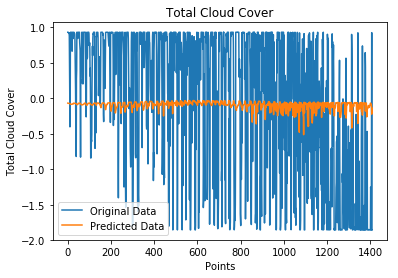

In [25]:
with tf.Session() as sess:
    # Initiate session and initialize all vaiables
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    #saver.restore(sess,'yahoo_dataset.ckpt')
    for i in range(100):
        c_t = []
        c_test = []
        for j in range(Xn_train.shape[0]):
            sess.run([cost,train],feed_dict=    {xs:Xn_train[j,:].reshape(1,npred), ys:yn_train[j]})
            # Run cost and train with each sample
        c_t.append(sess.run(cost, feed_dict={xs:Xn_train,ys:yn_train}))
        c_test.append(sess.run(cost, feed_dict={xs:Xn_test,ys:yn_test}))
        print('Epoch :',i,'Cost :',c_t)
    pred = sess.run(output, feed_dict={xs:Xn_test})
    # predict output of test data after training
    #print('Cost :',sess.run(cost, feed_dict={xs:Xn_test,ys:yn_test}))
    #y_test = denormalize(df_test,y_test)
    #pred = denormalize(df_test,pred)
    #Denormalize data     
    plt.plot(range(yn_test.shape[0]),yn_test,label="Original Data")
    plt.plot(range(yn_test.shape[0]),pred,label="Predicted Data")
    plt.legend(loc='best')
    plt.ylabel('Total Cloud Cover')
    plt.xlabel('Points')
    plt.title('Total Cloud Cover')
    plt.show()

In [16]:
output.get_shape().as_list()

[None, 3288]

In [17]:
c_t

[0.9849894]

In [ ]:
feed_dict={xs:Xn_train[j,:], ys:yn_train[j]}

In [ ]:
Xn_test.shape

In [ ]:
tf.reshape(Xn_train[j,:], [1, npred])

In [ ]:
n_nodes

In [ ]:
output = nn_model(Xn_train, n_nodes)

In [ ]:
output.get_shape().as_list()[1]